# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in Python;
- Carry out simple multivariate regression analyses;
- Use techniques to control for covariates;
- Conduct an observational study and reason about its results.

---

## Important Dates

- Homework release: Fri 18 Nov 2022
- **Homework due**: Fri 02 Dec 2022, 23:59
- Grade release: Mon 12 Dec 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at [FC Tokyo, a J1 League Japanese professional football club based in Chōfu, Tokyo](https://en.wikipedia.org/wiki/FC_Tokyo). The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

Your manager, Mr. Naoki Ogane, has noticed that an unusually high number of players in your team have birthdays in either April or May, so he asked you to investigate this further -- is this just a coincidence, or are players born in April or May simply better?

## Data

To answer Mr. Ogane's questions, you will use data from Wikipedia biographies. This is a subset of the Pantheon dataset (1). For tasks 1 to 4, you will use the file `japanese_athletes.csv.gz`. For task 5, you will use the file `all_entities.csv.gz`. Both datasets are`.csv` files with the same columns:

- `id`: a unique identifier per individual.
- `name`: name of the individual.
- `occupation`: the occupation of the individual (for `japanese_athletes.csv.gz`, these are all sports-related).
- `gender`: gender of the athlete.
- `alive`: flag indicating if the athlete was alive in 2020 when the dataset was collected.
- `bplace_country`: the country where the athlete was born  (for `japanese_athletes.csv.gz`, the value here is always 'Japan').
- `birthdate`: the date when the athlete was born.
- `birthyear`: the year when the athlete was born.
- `pageviews`: number of pageviews received by the athlete's page across Wikipedia language editions.

(1) Yu, A. Z., et al. (2016). Pantheon 1.0, a manually verified dataset of globally famous biographies. Scientific Data 2:150075. doi: 10.1038/sdata.2015.75

## Task 1 — 20 pts

As a good data scientist, you first load the data and perform some small sanity checks on it.

**1.1** Load the dataset containing data about Japanese athletes into memory using pandas. First, load the data directly from the compressed file. Then, print the first few lines of the dataset.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gmean
from scipy.stats import bootstrap
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)

In [14]:
#1.1 Loading the data
data_file = 'data/japanese_athletes.csv.gz'
df = pd.read_csv(data_file, compression='infer')
df.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933.0,455.0
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944.0,57847.0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937.0,1672.0
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918.0,541.0


In [15]:
df.isnull().values.any()

False

**1.2** Find the different occupations in the data and how many individuals belong to each occupation.

In [16]:
#1.2 Determine the number individuals per occupation
df.groupby(by='occupation')['occupation'].count()

occupation
ATHLETE                40
BASKETBALL PLAYER       2
BOXER                   2
CYCLIST                 4
GYMNAST                15
SKATER                 21
SKIER                  11
SOCCER PLAYER        3929
SWIMMER                21
TENNIS PLAYER          18
WRESTLER               60
Name: occupation, dtype: int64

**1.3** Calculate the percentage of individuals who remain alive in the data.

In [17]:
#1.3 The percentage of individuals alive
count_alive_dead = df.groupby(by='alive')['alive'].count()
print('The percentage of athlete still is alive is: {:.2f}%'.format((count_alive_dead.values[1]/count_alive_dead.sum())*100))

The percentage of athlete still is alive is: 97.19%


**1.4** Plot the distribution of birth years in the dataset. In other words, what fraction of individuals are born each year? (Note that the data contains individuals born only after the year 1900).

In [18]:
#1.4 Plot the distribution of birth years in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4123 non-null   int64  
 1   name            4123 non-null   object 
 2   occupation      4123 non-null   object 
 3   gender          4123 non-null   object 
 4   alive           4123 non-null   bool   
 5   bplace_country  4123 non-null   object 
 6   birthdate       4123 non-null   object 
 7   birthyear       4123 non-null   float64
 8   pageviews       4123 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 261.8+ KB


In [19]:
#Convert birthdate to datetime & birthyear to int
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['birthyear'] = df.birthyear.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              4123 non-null   int64         
 1   name            4123 non-null   object        
 2   occupation      4123 non-null   object        
 3   gender          4123 non-null   object        
 4   alive           4123 non-null   bool          
 5   bplace_country  4123 non-null   object        
 6   birthdate       4123 non-null   datetime64[ns]
 7   birthyear       4123 non-null   int64         
 8   pageviews       4123 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 261.8+ KB


In [20]:
df.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933,455.0
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944,57847.0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935,759.0
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937,1672.0
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918,541.0


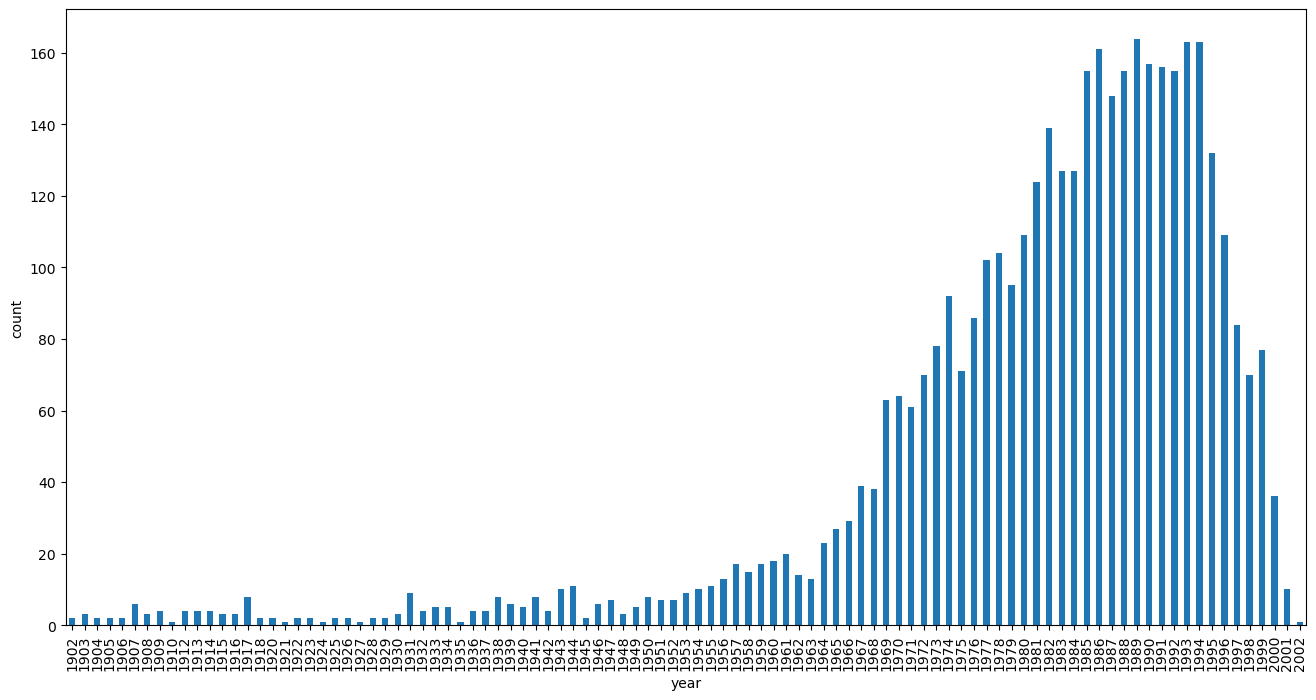

In [21]:
#Maybe we should reduce the number of xticks 
df.groupby(by='birthyear')['birthyear'].count().plot.bar(xlabel='year', ylabel='count', figsize=(16,8))
plt.tick_params(axis='x', labelrotation=90)

**1.5** Plot the empirical cumulative distribution function (CDF) to visualize the distribution of pageviews. Here you should use a linear scale for both the x-axis and the y-axis.

<AxesSubplot:xlabel='pageviews', ylabel='Proportion'>

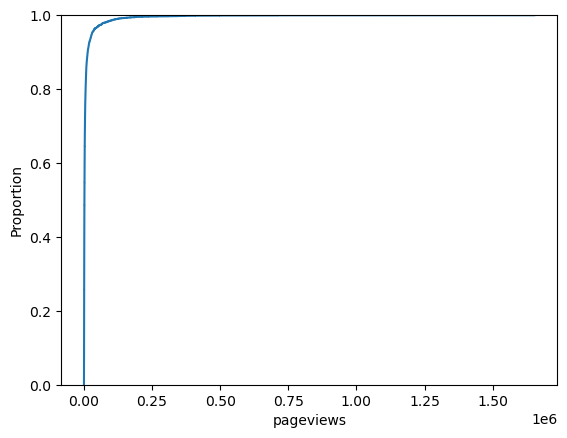

In [22]:
#1.5 Plot the empirical cumulative distribution function (CDF) to visualize the distribution of pageviews.
sns.ecdfplot(data=df, x='pageviews')

**Question 1.6 why is it hard to visualize the distribution in the above ECDF plot?:** 

Because a great majority of value for pageviews is close to 0, which means that the distribution of the data is heavily skewed to the left. Therefore the ecdf jumps straight to 1.


**1.7** Re-do the above CDF plot using a log scale for both the x-axis and the y-axis. Additionally, plot vertical lines that indicate the distribution's arithmetic and geometric means.

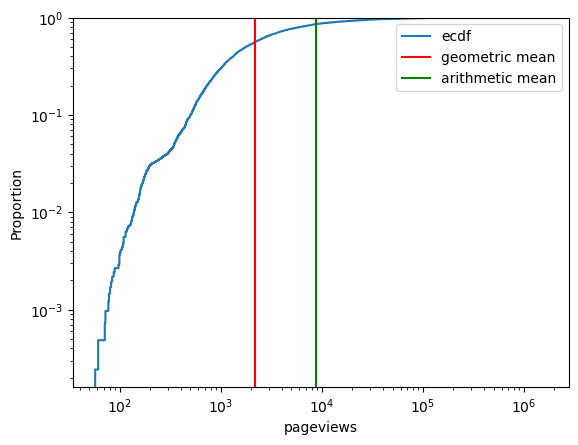

In [23]:
#1.7 Re-do the above CDF plot using a log scale for both the x-axis and the y-axis. Additionally, plot vertical lines that indicate the distribution's arithmetic and geometric means.
sns.ecdfplot(data=df, x='pageviews', log_scale=True, label='ecdf')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=gmean(df.pageviews), label='geometric mean', color='r')
plt.axvline(x=df.pageviews.mean(), label='arithmetic mean', color='g')
plt.legend()

**Question 1.8 Visually, does it look like the distribution is a power law?**

(I don't think so.) As discussed in the lectures, a power distribution can be seen when we have a negative slope on our log scaled portrayal and in our case we do not have one. (Someone please check) 

**1.9** Estimate the 95% confidence intervals of the geometric mean and the arithmetic mean of pageviews using bootstrap resampling.

In [24]:
#1.9 Estimate the 95% confidence intervals of the geometric mean and the arithmetic mean of pageviews using bootstrap resampling.
res_arithmetic = bootstrap((df.pageviews.values,), np.mean, confidence_level=0.95)
res_geometric = bootstrap((df.pageviews.values,), gmean, confidence_level=0.95)

In [25]:
print("The 95%CI with bootstrap for arithmetic mean is: [{:.2f},{:.2f}]".format(res_arithmetic.confidence_interval[0], res_arithmetic.confidence_interval[1]))
print("The 95%CI with bootstrap for geometric mean is: [{:.2f},{:.2f}]".format(res_geometric.confidence_interval[0], res_geometric.confidence_interval[1]))

The 95%CI with bootstrap for arithmetic mean is: [7681.02,10295.12]
The 95%CI with bootstrap for geometric mean is: [2095.79,2282.47]


**1.10 What advantages does the geometric mean have over the arithmetic mean to summarize the distribution?**



Like most of our analysis in the first part, the primary reason for using geometric means over arithmetic means is to have it be less effected by our skewed data. (probably should add more)

## Task 2 — 20 pts

Next, investigate the question posed by Mr. Ogane. *Why do so many Tokyo FC players have birthdays in the same month?* 
Here you will not look specifically at Tokyo FC players, but more generally at the birthdays of the athletes in the dataset you have explored in Task 1

**2.1** Calculate and plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months, i.e., what percentage of births happen in January, February, etc.

([<matplotlib.axis.XTick at 0x7f89e0c4ea60>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

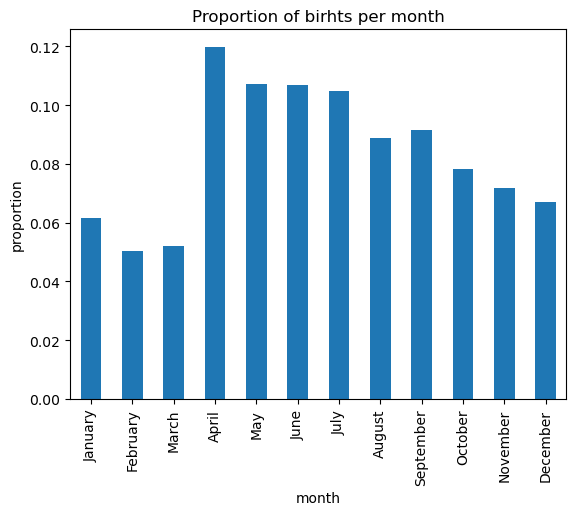

In [26]:
#2.1 Calculate and plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months, i.e., what percentage of births happen in January, February, etc.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
(df.groupby(df.birthdate.dt.month)['birthdate'].value_counts().unstack().sum(axis=1)/len(df)).plot.bar(xlabel='month', ylabel='proportion', title='Proportion of birhts per month')
plt.xticks(np.arange(0,12), months)

**2.2** Puzzled with the results, you use census data to retrieve the percentage of births happening each month (this is given to you in an array below). Plot this distribution.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

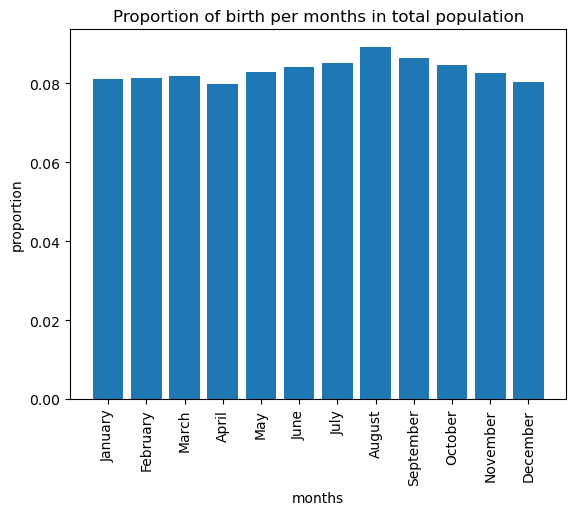

In [27]:
#2.2  Puzzled with the results, you use census data to retrieve the percentage of births happening each month (this is given to you in an array below). Plot this distribution.
birth_per_month = np.array([
0.08118368,0.08148065, 0.08182577, 0.07982728, 0.08301363,
0.08422556, 0.08518067, 0.08925791, 0.08635247, 0.08460279,
0.08258825, 0.08046134
])

plt.bar(x=months, height=birth_per_month)
plt.xlabel('months')
plt.ylabel('proportion')
plt.title('Proportion of birth per months in total population')
plt.xticks(rotation=90)


**2.3 What is different between the distributions you ploted in 2.1 and 2.2:**

After discussing with your colleagues at work, a theory comes to your mind: school in Japan starts in April. Children who were born between April 1 and March 31 of the following year are placed within the same grade. Therefore, you suspect that the observed pattern may have something to do with when students start school.

**2.4** Considering that students in Japanese schools have the same birth distribution over the months of the year as the overall Japanese population, i.e., the `birth_per_month` array that was provided to you, calculate:

- For students born in April, how many months older are they than the average student in their grade?
- For students born in March, how many months younger are they than the average student in their grade?

In [28]:
# 2.4 Considering that students in Japanese schools have the same birth distribution over the months of the year as the overall Japanese population, i.e., the `birth_per_month` array that was provided to you, calculate:
# 2.4a For students born in April, how many months older are they than the average student in their grade?
k=0
N = len(birth_per_month)
diff = 0
for i in range(len(birth_per_month)):
    if i+3 < len(birth_per_month):
        #print('i1', i, i+3)
        diff += birth_per_month[i+3]*i
    if i+3 > len(birth_per_month)-1:
        j = N-(i+3-k)
        diff += birth_per_month[j]*i
        #print('i2,j',i,j)
        k += 2
print('A student born in April is in average {:.2f} months older than his classmates'.format(diff))

A student born in April is in average 5.47 months older than his classmates


In [29]:
#2.4b For students born in March, how many months younger are they than the average student in their grade?
k=0
l=1
N = len(birth_per_month)
diff = 0
for i in range(len(birth_per_month)):
    if i <=2:
        j = i+2-k
        #print(i,j, birth_per_month[j])
        diff += birth_per_month[j]*i
        k +=2
    if i >2:
        m = N-l
        #print(i,m, birth_per_month[m])
        diff += birth_per_month[m]*i
        l+=1
        

print('A student born in March is in average {:.2f} months younger than his classmates'.format(diff))

A student born in March is in average 5.53 months younger than his classmates


**2.5 Considering your common sense and the results obtained from the simulation: what advantage do students born in April have over those born in March? How may this affect their odds of becoming professional athletes?** 

Students in April appear to have an inherent advantage over those in March because they have had far more time to be develop and practice their sport relative to their classmates. And perhaps since professional athletes are scouted by class groups, the ones born in April are a little older and more developed which tends to have an effect on their chances of becoming a professional athlete.

## Task 3 — 20 pts

You report your findings to Mr. Ogane, who receives them with great interest. He asks you: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* (Here, “Wikipedia-famous” refers to those individuals notable enough to have made it into English Wikipedia.)

**3.1** Create a new column in the dataframe called `date_diff` representing the distance between the athlete's birthdate and the cutoff date of his school class. 
- For individuals born in April, May, June, July, August, and September: The distance should be positive and represent the number of days between the birthdate and the previous April 1. For example, if someone is born on April 1, the distance is 0, if someone is born on April 10, the distance is 9, etc.
- For individuals born in October, November, December, January, February, and March: The distance should be negative and represent the number of days between the following April 1 and the birthdate. For example, if someone is born on March 31, the distance is -1; if someone is born on March 27, the distance is -5.
- Print the `date_diff` for the athletes with ids:  `20639249` and `58982155`.

# somone please review my work. I came up with a clever solution but i feel iffy about it. I feel iffy because of 3.5 and 3.6

In [30]:
# 3.1 - Make a copy of the dataframe, and make a new column that takes our athletes birthyear and combines it with april 1 (-04-01). Once we
#       get that we can subtract two datetime objects to obtain the distance

from pandas.tseries.offsets import DateOffset

df_date = df.copy()
df_date['cutoff_date'] = 0 
df_date['month'] = df_date['birthdate'].dt.month 


# we shift our calendar so we can obtain the proper distance calculations. So we offset all months by 3
df_date['new_bday'] = df_date['birthdate'] + DateOffset(days=91)
special_months = [10,11,12]

# calculates the cutoff time as specified in the instruction
for i in range(len(df_date)):
    if df_date['month'][i] in special_months:
        df_date['cutoff_date'][i] = str(df_date['birthyear'][i]+1) + '-07-01'
    else:
        df_date['cutoff_date'][i] = str(df_date['birthyear'][i]) + '-07-01'
df_date['cutoff_date'] = pd.to_datetime(df_date['cutoff_date'])

# magic: because nothing in our original dataframe changes. range is between -180 to 179
df['date_diff'] = (df_date['new_bday'] - df_date['cutoff_date']).dt.days 
df

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_39150/612776290.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cutoff_date'][i] = str(df_date['birthyear'][i]+1) + '-07-01'


,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,date_diff
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933,455.0,-108
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944,57847.0,14
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935,759.0,-24
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937,1672.0,-29
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918,541.0,-6
...,...,...,...,...,...,...,...,...,...,...
4118,58970633,Yuki Amano,SOCCER PLAYER,M,True,Japan,2000-04-17,2000,176.0,16
4119,61250844,Tomoya Uemura,SOCCER PLAYER,M,True,Japan,2000-05-19,2000,418.0,48
4120,58982155,Shosei Okamoto,SOCCER PLAYER,M,True,Japan,2000-04-07,2000,2354.0,6
4121,55188205,Taiga Nakajima,SOCCER PLAYER,M,True,Japan,1999-08-01,1999,77.0,122


**3.2** Create three numpy arrays `x`, `y`, and `ind` all of size 360. 
- `x` should contain the integers between -180 and 179 (-180 and 179 inclusive). 
- `y` should contain the percentage of athletes born with a `date_diff` equal to the corresponding value of `x`.
- `ind` should contain 0 if `x` is smaller than zero and 1 if `x` is bigger or equal to zero.

**Comment**: Note that in **3.2**, the size of the array created is slightly smaller than the number of days in the year. This is for simplicity's sake.

In [31]:
# x array
x = np.arange(-180,180)

# y array (contains indices to map with the x array)
df = df[df['date_diff'].isin(x)]
y = df['date_diff'].value_counts(normalize=True) * 100
y = y.sort_index()

# z array
ind = np.zeros(360)
ind[180:] = 1


In [32]:
x

array([-180, -179, -178, -177, -176, -175, -174, -173, -172, -171, -170,
       -169, -168, -167, -166, -165, -164, -163, -162, -161, -160, -159,
       -158, -157, -156, -155, -154, -153, -152, -151, -150, -149, -148,
       -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137,
       -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126,
       -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115,
       -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104,
       -103, -102, -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,
        -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,
        -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,
        -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,
        -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,
        -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,
        -37,  -36,  -35,  -34,  -33,  -32,  -31,  -

In [33]:
# ordered the y array, making sure values correspond 
y

-180    0.442696
-179    0.393507
-178    0.418101
-177    0.319725
-176    0.245942
          ...   
 175    0.393507
 176    0.393507
 177    0.393507
 178    0.172159
 179    0.196754
Name: date_diff, Length: 360, dtype: float64

In [34]:
ind

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

**3.3** Estimate the following linear regression: `y ~ x + ind` using `statsmodels`. Report the summary of the model.

In [35]:
# turn our numpy arrays into dataframe so we can feed it into statsmodels
dataset = pd.DataFrame({'x': x, 'y': list(y), 'ind': ind}, columns=['x', 'y', 'ind'])
dataset

,x,y,ind
0,-180,0.442696,0.0
1,-179,0.393507,0.0
2,-178,0.418101,0.0
3,-177,0.319725,0.0
4,-176,0.245942,0.0
...,...,...,...
355,175,0.393507,1.0
356,176,0.393507,1.0
357,177,0.393507,1.0
358,178,0.172159,1.0


In [36]:
# fit model like tutorials
model = smf.ols(formula='y ~ x + ind', data=dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     119.0
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.47e-40
Time:                        14:28:15   Log-Likelihood:                 356.37
No. Observations:                 360   AIC:                            -706.7
Df Residuals:                     357   BIC:                            -695.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1568      0.011     14.686      0.0

**3.4** **Discuss:** What does the coefficient associated with the dummy variable `ind` captures in the above regression?

the dummy variable in this instance is to distinguish categorical groups between two groups. In our case we are trying to see if the two split groups of months plays a role in their career trajectory to become a professional athlete. 

**3.5** Use the model parameters to estimate the percentage of athletes born on March 31st, i.e., use the intercept ($\beta_0$) and the coefficient associated with `x` ($\beta_1$) and calculate: $\beta_0 - 1 * \beta_1$ (recall that $x$ equals -1 in March 31st).

In [37]:
results.params[0] - 1 * results.params[1]

0.15740209804040606

**3.6** Use the model parameters to estimate the percentage of athletes born on April 1st.

In [38]:
results.params[0] + 0 * results.params[1]

0.156799066183882

**3.7** **Discuss:** Drawing from your knowledge of observational studies and the questions answered thus far, respond to Mr. Ogane's question: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* Explain whether the evidence you have obtained is convincing and why.

## Task 4 — 20 pts

You return to Mr. Ogane with your findings, which he again receives with great interest. The sharp manager, however, asks a question that ignites your curiosity: *are athletes that are born right after the school cut-off date (i.e., in April or May) simply better?**

To understand if that is the case, you come up with a plan: the number of pageviews received by a Wikipedia page is a good way to differentiate between mildly famous athletes and truly famous ones. Thus you can do a matched analysis comparing athletes born in February or March (right before the cut-off) with athletes born in April or May (right after the cut-off); you should discard all athletes that were not born in one of these four months.

To make matched athletes even more comparable, you will also only consider pairs of athletes that:
1. were born in the same year; 
2. have the same gender; and
3. have the same occupation.

Matching should be done 1-to-1; i.e., each athlete born in February/March should be matched to one and only one athlete born in April/May (there will naturally be some athletes left unmatched).

**4.1** Obtain the matched data described in the text above. Report the number of matched pairs and the number of discarded athletes. Your resulting dataframe should contain one row per athlete and an indicator variable `is_after`, which equals 1 when the athlete was born in April or May and 0 otherwise. Note that here you are doing exact matching, and not propensity score matching!


In [39]:
# Create a dataframe that only contains athletes born in  feb, march, april and may
df_ = df.copy()
df_ = df_.loc[(df_["date_diff"] >= -59)&(df_["date_diff"] <= 61)]
df_['date_diff'].describe()
df_['date_diff'].astype(int)

1       14
2      -24
3      -29
4       -6
5      -29
        ..
4117    37
4118    16
4119    48
4120     6
4122    55
Name: date_diff, Length: 1381, dtype: int64

In [40]:
total_nb = len(df_)

In [41]:
# Add is_after column
df_['is_after'] = df_['date_diff'].lt(0).astype(int)
df_.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,date_diff,is_after
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944,57847.0,14,0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935,759.0,-24,1
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937,1672.0,-29,1
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918,541.0,-6,1
5,20641239,Yasuo Takamori,SOCCER PLAYER,M,False,Japan,1934-03-03,1934,1047.0,-29,1


In [42]:
# filter out players that are the only one born in their birth year
birthyear_count_dict = {'count': df_.groupby(by='birthyear')['birthyear'].count()}
birthyear_count = pd.DataFrame(birthyear_count_dict)
birthyear_count.head()

,count
birthyear,
1904,1
1905,2
1906,2
1907,2
1909,2


In [43]:
# filter years with counts smaller or equal to 1, since it won't match anyway
birthyear_count = birthyear_count[birthyear_count['count'] > 1]
birthyear_count.reset_index(inplace=True)
birthyear_count = birthyear_count.rename(columns = {'index':'birthyear'})
birthyear_list = birthyear_count['birthyear']

In [44]:
# create dataframe containing the value of birthyear from the list that we created
df_ = df_[df_['birthyear'].isin(birthyear_count['birthyear'])]

In [45]:
df_matched = df_.copy()
#keep track of the matching of the players with the column 'match'
df_matched['match'] = 0

for i in df_matched.index:
    if (df_matched['match'][i] == 0): 
        for j in df_matched.index:
            if (df_matched['match'][j] == 0):
                if (df_matched['birthyear'][i] == df_matched['birthyear'][j] and df_matched['occupation'][i] == df_matched['occupation'][j] and 
                    df_matched['gender'][i] == df_matched['gender'][j] and i!=j and df_matched['is_after'][i] != df_matched['is_after'][j]):
                    df_matched['match'][i] = df_matched['match'][j] = 1
                    break
                else: 
                    df_matched['match'][i] = df_matched['match'][j] = 0

df_matched = df_matched.loc[df_matched["match"] == 1]
df_matched.head()

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_39150/1491973115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matched['match'][i] = df_matched['match'][j] = 0
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_39150/1491973115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matched['match'][i] = df_matched['match'][j] = 1


,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,date_diff,is_after,match
5,20641239,Yasuo Takamori,SOCCER PLAYER,M,False,Japan,1934-03-03,1934,1047.0,-29,1,1
13,25864538,Kenzo Ohashi,SOCCER PLAYER,M,False,Japan,1934-04-21,1934,758.0,20,0,1
18,25864213,Shiro Teshima,SOCCER PLAYER,M,False,Japan,1907-02-26,1907,699.0,-34,1,1
21,25864203,Yasuo Haruyama,SOCCER PLAYER,M,False,Japan,1906-04-04,1906,935.0,3,0,1
29,733681,Kazuyoshi Miura,SOCCER PLAYER,M,True,Japan,1967-02-26,1967,496424.0,-34,1,1


In [46]:
len(df_matched)

720

In [47]:
total_nb - len(df_matched)

661

The number of players that were matched is 720 and the number of players that were left unmatched is 661.

**4.2** The number of pageviews is heavy-tailed, as we have seen in Task 1. Create a new column in your matched dataframe containing the natural logarithm of the number of pageviews.

In [48]:
#Added a column containing the natural logarithm of the number of pageviews
df_matched['natural_logarithm_pageviews'] = np.log(df_matched['pageviews'])
df_matched.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,date_diff,is_after,match,natural_logarithm_pageviews
5,20641239,Yasuo Takamori,SOCCER PLAYER,M,False,Japan,1934-03-03,1934,1047.0,-29,1,1,6.953684
13,25864538,Kenzo Ohashi,SOCCER PLAYER,M,False,Japan,1934-04-21,1934,758.0,20,0,1,6.630683
18,25864213,Shiro Teshima,SOCCER PLAYER,M,False,Japan,1907-02-26,1907,699.0,-34,1,1,6.549651
21,25864203,Yasuo Haruyama,SOCCER PLAYER,M,False,Japan,1906-04-04,1906,935.0,3,0,1,6.840547
29,733681,Kazuyoshi Miura,SOCCER PLAYER,M,True,Japan,1967-02-26,1967,496424.0,-34,1,1,13.115186


**4.3** Assuming that whether the athlete is born in the two months right before the cutoff (February and March) or the two months right after (April and May) is assigned at random, use a linear regression to estimate the effect of being born after rather than before the cutoff date in the number of pageviews athletes receive. Use the log-transformed value you calculated in **4.2** as the outcome of your model (i.e., the $y$ of the regression). Report the summary of your model.

In [49]:
# Declaration of the model, pageviews estimated according to whether the athlete was born before or after the cutoff
mod = smf.ols(formula='natural_logarithm_pageviews ~ C(is_after)', data=df_matched)

In [50]:
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

In [51]:
# Print thes summary output provided by the library.
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     natural_logarithm_pageviews   R-squared:                       0.000
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.2675
Date:                         Thu, 24 Nov 2022   Prob (F-statistic):              0.605
Time:                                 14:30:39   Log-Likelihood:                -1265.5
No. Observations:                          720   AIC:                             2535.
Df Residuals:                              718   BIC:                             2544.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

**4.4** **Discuss:** Interpret the coefficients obtained from the linear regression.

The equation obtained is: logarithmic pageviews = 7.8793 -0.0542*is_after.
is_after is not a predictor of pageviews, the p-value equals 0.605, which is bigger than 0.05. 
Therefore, we can conclude that there is no correlation between the birthmonth of the players and the pageviews.

**4.5** Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:
- Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:
    1. "Skill": an individual's innate talent towards a sport.
    2. "Relative Age": how old an individual was in comparison to his or her peers.
    3. "Success before adulthood": how successful the individual is as an athlete as a child/teenager.
    4. "Success as an adult": how successful the individual is as an athlete as an adult.
- **Discuss:** Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram.

## Task 5 — 20 pts

Your findings in Task 4 provide important information for Tokyo FC to scout for young athletes. However, Mr. Ogane points out that other countries have messier cut-off dates for school (e.g., in the U.S., it varies widely by state), and thus the results may be less applicable to other countries.

While you could investigate specific cut-off dates per country, you decide to first use your machine learning skills to get a sense of how promising your efforts might turn out to be. This is made easy as you find an extended version of the dataset you've been working on so far, which contains data about all Wikipedia biographies all around the world

**5.1**Load the dataset containing data about Wikipedia-famous individuals into memory using pandas. You should load the data directly from the compressed file. Then, print the first few lines of the dataset.

In [52]:
df_world = pd.read_csv('./data/all_entities.csv.gz')
df_world.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0


In [53]:
df_world.isnull().values.any()

True

**5.2** Create two columns in this dataframe:
- `is_athlete` an indicator variable which equals 1 if the occupation of an individual is related to a sport (you are provided with a list below) and 0 otherwise.
- `dayofyear` an integer between 1 and 366 indicating on which day of the year the individual was born.

In [54]:
athlete_categories = {
    'ATHLETE',
    'BASKETBALL PLAYER',
    'BOXER',
    'CYCLIST',
    'GYMNAST',
    'HANDBALL PLAYER',
    'HOCKEY PLAYER',
    'SKATER',
    'SKIER',
    'TENNIS PLAYER',
    'SOCCER PLAYER',
    'SWIMMER',
    'WRESTLER'
}

In [55]:
# apply a one hot encoding if they are an athlete
df_world['is_athlete'] = df_world['occupation'].apply(lambda y: 1 if y in athlete_categories else 0)
df_world['birthdate'] = pd.to_datetime(df_world['birthdate'])
df_world['dayofyear'] = df_world['birthdate'].dt.day

In [56]:
df_world

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,is_athlete,dayofyear
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0,0,14
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0,0,14
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0,0,17
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0,0,18
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0,1,17
...,...,...,...,...,...,...,...,...,...,...,...
49218,56315624,Red Gerard,ATHLETE,M,True,United States,2000-06-29,2000.0,1630.0,1,29
49219,44634432,Abbey Weitzeil,SWIMMER,F,True,United States,1996-12-03,1996.0,528.0,1,3
49220,34437098,Michelle Creber,ACTOR,F,True,Canada,1999-09-07,1999.0,463.0,0,7
49221,36605204,Constantine Louloudis,ATHLETE,M,True,United Kingdom,1991-09-15,1991.0,403.0,1,15


**5.3** For each country:
- Create a training set with 80% of the individuals and a test set with the remaining 20%;
- Train a random forest model (using `sklearn`, you can use the default parameters) to predict whether an individual is an athlete or not based on: 1) the day of the year they were born `dayofyear`; 2) the year they were born (e.g., 1964, year should be a numerical variable) and 3) their gender.
- report the precision of your classifier for each country.

In [57]:
df_world['year'] = df_world['birthdate'].dt.year
# change categorical information of gender to 0 for women 1 for men
df_world['gender'] = df_world['gender'].apply(lambda y: 1 if y == 'M' else 0)

In [58]:
# train and test set - standard split
X = df_world[['dayofyear', 'year', 'gender']]
y = df_world['is_athlete']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
from sklearn.ensemble import RandomForestClassifier

# create a classifier using random forest classifier
clf=RandomForestClassifier()

# train on our training set 
clf.fit(X_train,y_train)

# predict on our test set
y_pred=clf.predict(X_test)

In [60]:
from sklearn import metrics
# Get the model accuracy
print("Accuracy of our Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of our Random Forest Classifier: 0.7217877094972067


classifier per country

In [61]:
countries=df_world['bplace_country'].unique().tolist()

In [62]:
# the instructions says to do it per country so we took the previous steps and meshed them into one 
for country in countries:
    curr = df_world.loc[df_world.bplace_country==country]
    X = curr[['dayofyear', 'year', 'gender']]
    y = curr['is_athlete']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    clf=RandomForestClassifier()
    # train on our training set 
    clf.fit(X_train,y_train)
    # predict on our test set
    y_pred=clf.predict(X_test)
    print("Accuracy of our Random Forest Classifier for {}: {}".format(country, metrics.accuracy_score(y_test, y_pred)))


Accuracy of our Random Forest Classifier for United States: 0.8211946050096339
Accuracy of our Random Forest Classifier for Argentina: 0.7454545454545455
Accuracy of our Random Forest Classifier for South Africa: 0.7755102040816326
Accuracy of our Random Forest Classifier for Spain: 0.7077363896848138
Accuracy of our Random Forest Classifier for Mexico: 0.684931506849315
Accuracy of our Random Forest Classifier for United Kingdom: 0.7167042889390519
Accuracy of our Random Forest Classifier for Poland: 0.671875
Accuracy of our Random Forest Classifier for Russia: 0.6666666666666666
Accuracy of our Random Forest Classifier for Brazil: 0.8016528925619835
Accuracy of our Random Forest Classifier for France: 0.7551867219917012
Accuracy of our Random Forest Classifier for Germany: 0.6735537190082644
Accuracy of our Random Forest Classifier for Romania: 0.5866666666666667
Accuracy of our Random Forest Classifier for India: 0.9352941176470588
Accuracy of our Random Forest Classifier for Italy:

**5.4** Estimate the percentage of `athlete` individuals per country (simply by counting in the data).

In [63]:
for country in countries:
    curr = df_world.loc[df_world.bplace_country==country]
    percentage = curr['is_athlete'].sum()/len(curr)
    print("Percentage of athelets in {}: {}".format(country, percentage))

Percentage of athelets in United States: 0.1603082851637765
Percentage of athelets in Argentina: 0.728380024360536
Percentage of athelets in South Africa: 0.45041322314049587
Percentage of athelets in Spain: 0.6517498565691336
Percentage of athelets in Mexico: 0.41597796143250687
Percentage of athelets in United Kingdom: 0.31179394487121553
Percentage of athelets in Poland: 0.4474097331240188
Percentage of athelets in Russia: 0.48035714285714287
Percentage of athelets in Brazil: 0.8311258278145696
Percentage of athelets in France: 0.45802161263507896
Percentage of athelets in Germany: 0.49793046357615894
Percentage of athelets in Romania: 0.5683646112600537
Percentage of athelets in India: 0.05535924617196702
Percentage of athelets in Italy: 0.4714527981910684
Percentage of athelets in Ukraine: 0.43493761140819964
Percentage of athelets in Japan: 0.8490527182866557
Percentage of athelets in China: 0.38198198198198197
Percentage of athelets in Belgium: 0.6158088235294118
Percentage of a

**5.5** **Discuss:** how can the results from **5.4** impact the metric (precision) used in **5.3**? What could be a better suited metric to use here?

**5.6** Repeat the procedure done in **5.3**, but now calculate the metric you proposed in **5.5**.

**5.7** **Discuss:** according to this analysis, in which other countries might you be able to use the date of birth to recruit good athletes? Justify.